### 原先theta*xb = 0, 现在更换0为threshold，导致决策边界改变，分类结果改变

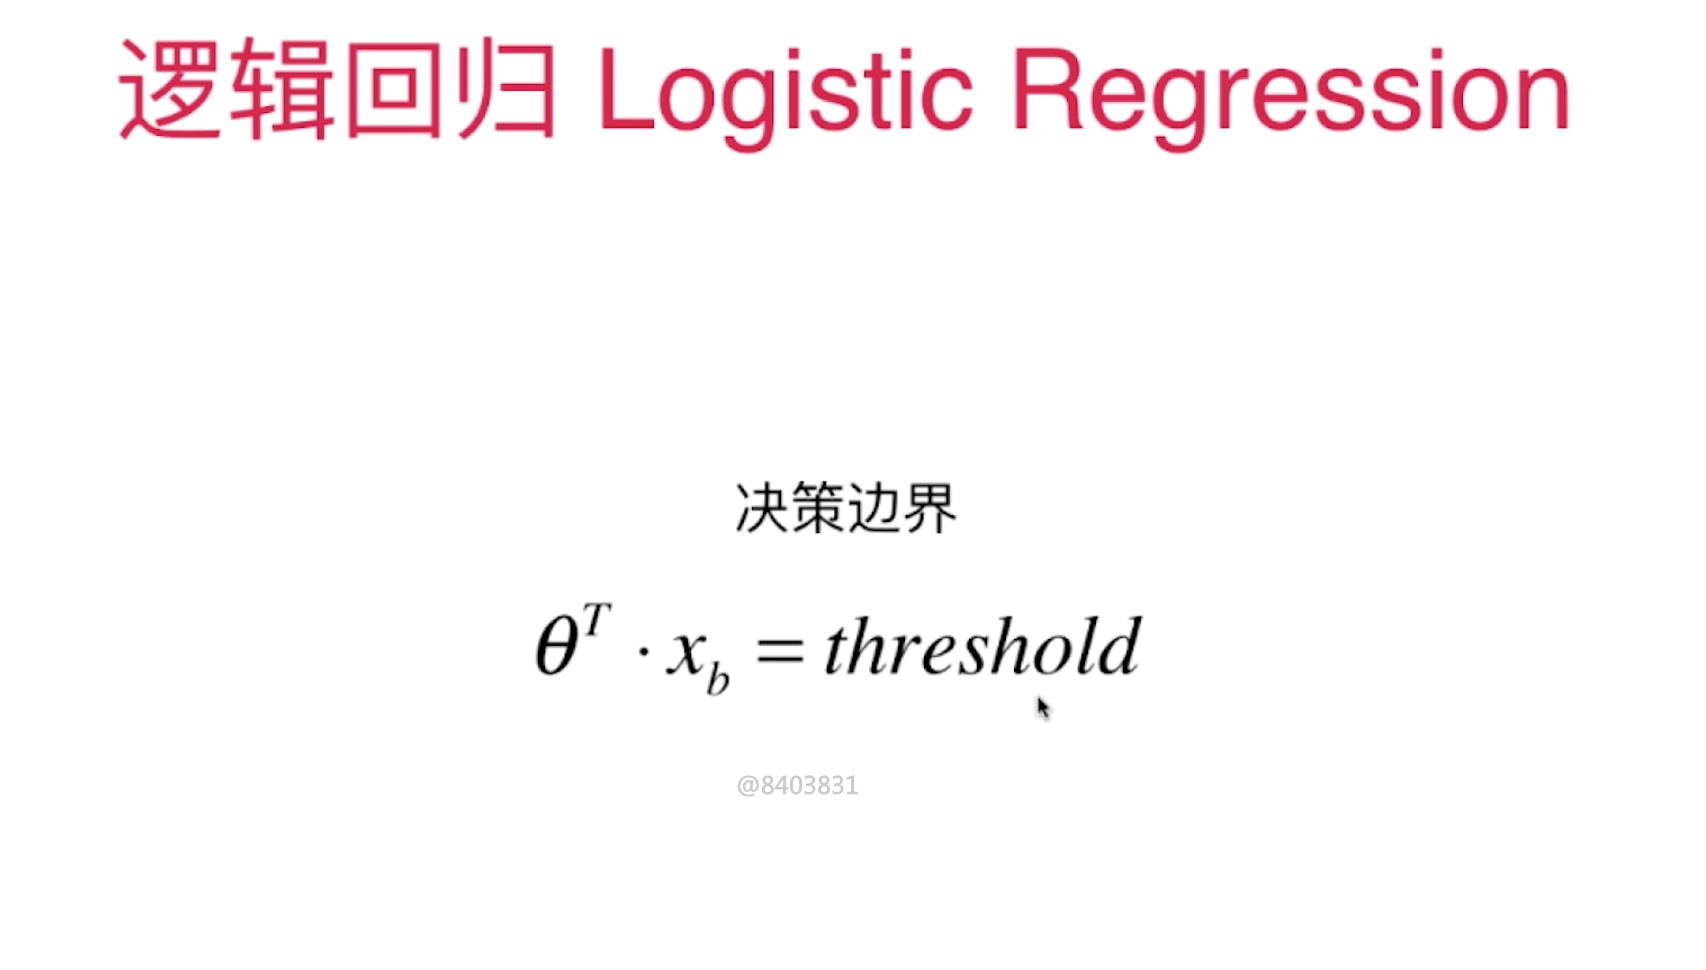

### 精准率和召回率是矛盾的 !!!!!!!

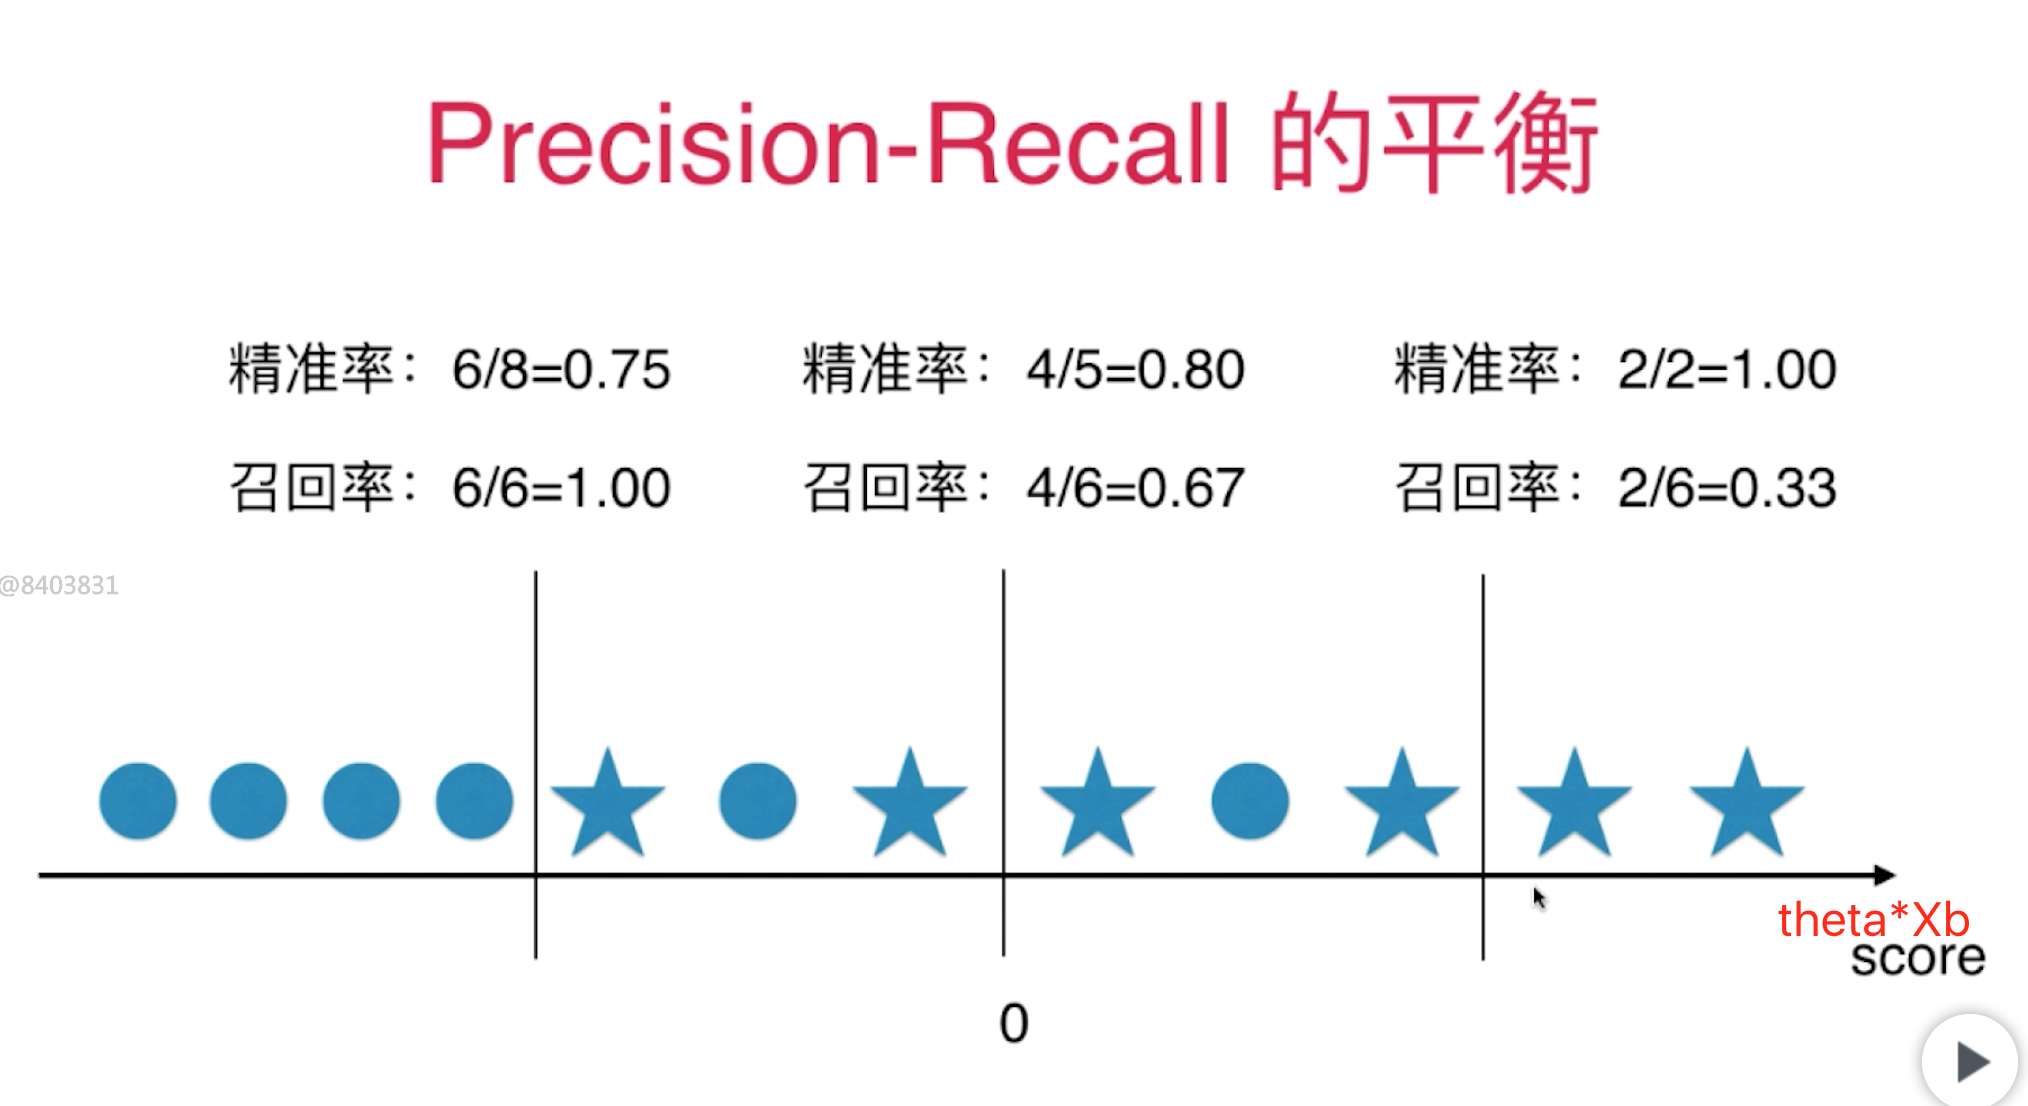

### 可以用Precision-Recall曲线包围的面积来衡量模型好坏

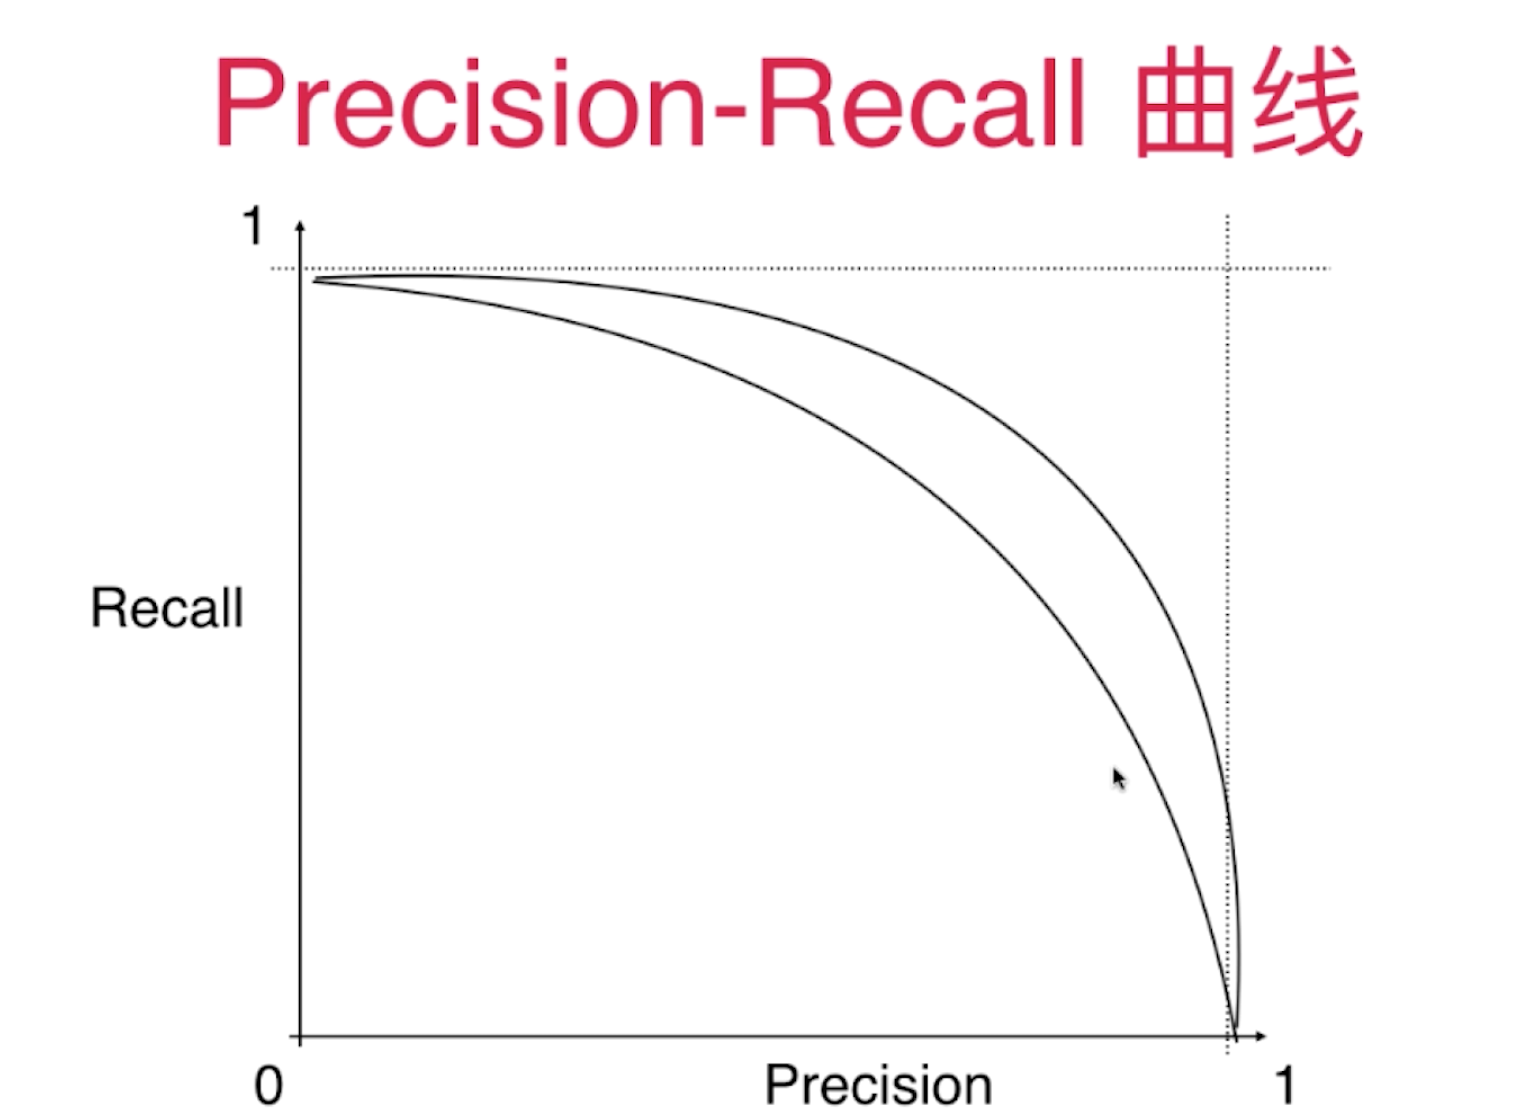

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [13]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [14]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [15]:
log_reg.decision_function(X_test)   # decision_function 是 theta*Xb

array([-22.05698239, -33.02946862, -16.21340949, -80.37930019,
       -48.25126816, -24.54013547, -44.39168672, -25.04309237,
        -0.97826507, -19.71755291, -66.25140975, -51.0961928 ,
       -31.49352849, -46.05328073, -38.67890293, -29.80477695,
       -37.5885851 , -82.57575307, -37.81916757, -11.01164631,
        -9.17443126, -85.13009374, -16.7160397 , -46.23736773,
        -5.33004766, -47.91762658, -11.66738829, -39.19644607,
       -25.25304446, -14.36645109, -16.99794275, -28.91918782,
       -34.33956373, -29.47644763,  -7.85814135,  -3.82080333,
       -24.08194074, -22.1636273 , -33.61240339, -23.1403164 ,
       -26.91816443, -62.38948765, -38.85706431, -66.77271181,
       -20.14485101, -17.47889047, -18.06801186, -22.2223851 ,
       -29.62317825, -19.73168208,   1.49550672,   8.32089692,
       -36.29345408, -42.5074197 , -25.90457026, -34.98973397,
        -8.4202571 , -50.04738491, -51.48216721,  19.88972354,
        -8.91890449, -31.99354112, -11.66112951,  -0.47

In [16]:
log_reg.decision_function(X_test)[:10]

array([-22.05698239, -33.02946862, -16.21340949, -80.37930019,
       -48.25126816, -24.54013547, -44.39168672, -25.04309237,
        -0.97826507, -19.71755291])

In [18]:
log_reg.predict(X_test)[:10]   # 验证下结果

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
decision_scores = log_reg.decision_function(X_test)

In [20]:
np.min(decision_scores)

-85.68617667789036

In [21]:
np.max(decision_scores)

19.889723543388786

In [22]:
# 选择阈值为5
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [23]:
confusion_matrix(y_predict_2, y_test)

array([[404,  21],
       [  1,  24]])

In [24]:
precision_score(y_test, y_predict_2)

0.96

In [25]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [26]:
# 选择阈值为-5
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [27]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]])

In [28]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [29]:
recall_score(y_test, y_predict_3)

0.8888888888888888

# 精准率-召回率曲线

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

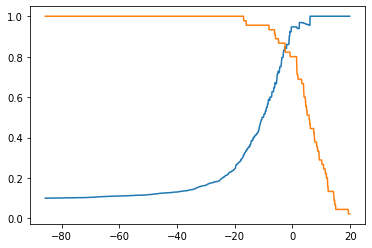

In [36]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### precision-recall 曲线

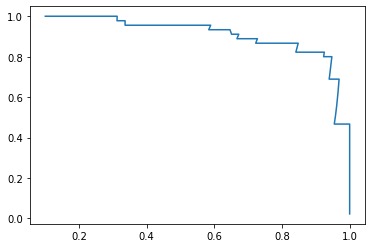

In [37]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn 中的 precision-recall 曲线

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [39]:
precisions.shape    # precision_recall_curve自动定义步长

(145,)

In [40]:
recalls.shape

(145,)

In [41]:
thresholds.shape  # 最大的thresholds的precision为1，recall值为0，默认

(144,)

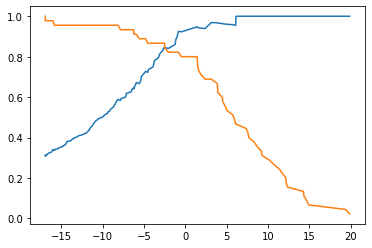

In [42]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

### 上图说明precision_recall_curve自动找出了图像最为重要的一部分

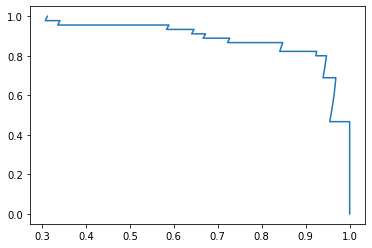

In [43]:
plt.plot(precisions, recalls)
plt.show()

### 上图一般选取急剧下降开始的点作为平衡点

### 下图可看出Precision-Recall的好坏

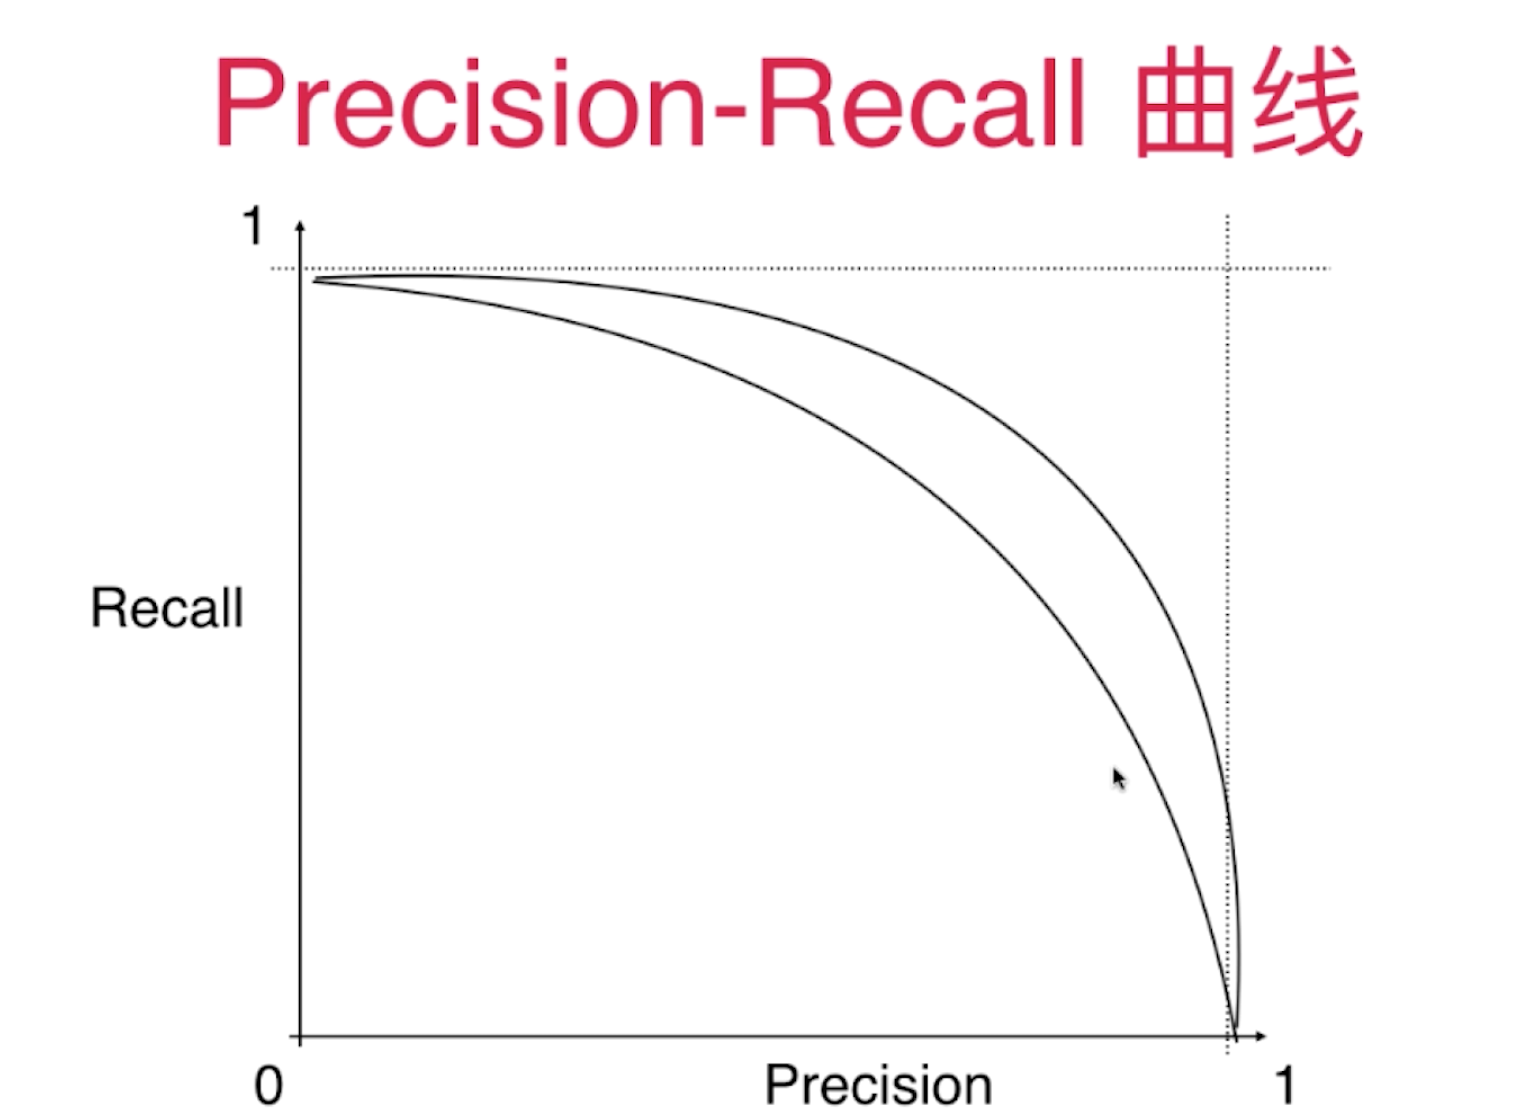